<a href="https://colab.research.google.com/github/Harshita3112/AI_projects/blob/main/fashion_MNIST_data_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Data Classification Project

step 1) Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

step 2) load data

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# print the shape of data

In [ ]:
x_train.shape,y_train.shape, "***************" , x_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["T-shirt/top",	"Trouser",	"Pullover",	"Dress", "Coat", "Sandal", "Shirt", "Sneaker"	, "Bag", "Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# show images

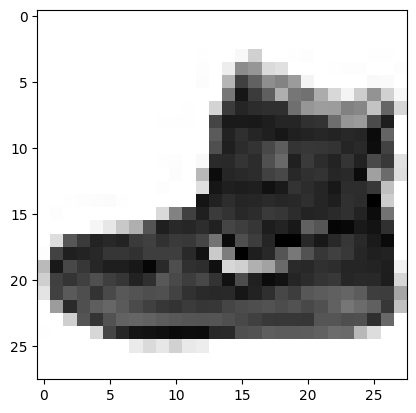

In [ ]:
plt.imshow(x_train[0],cmap='Greys')

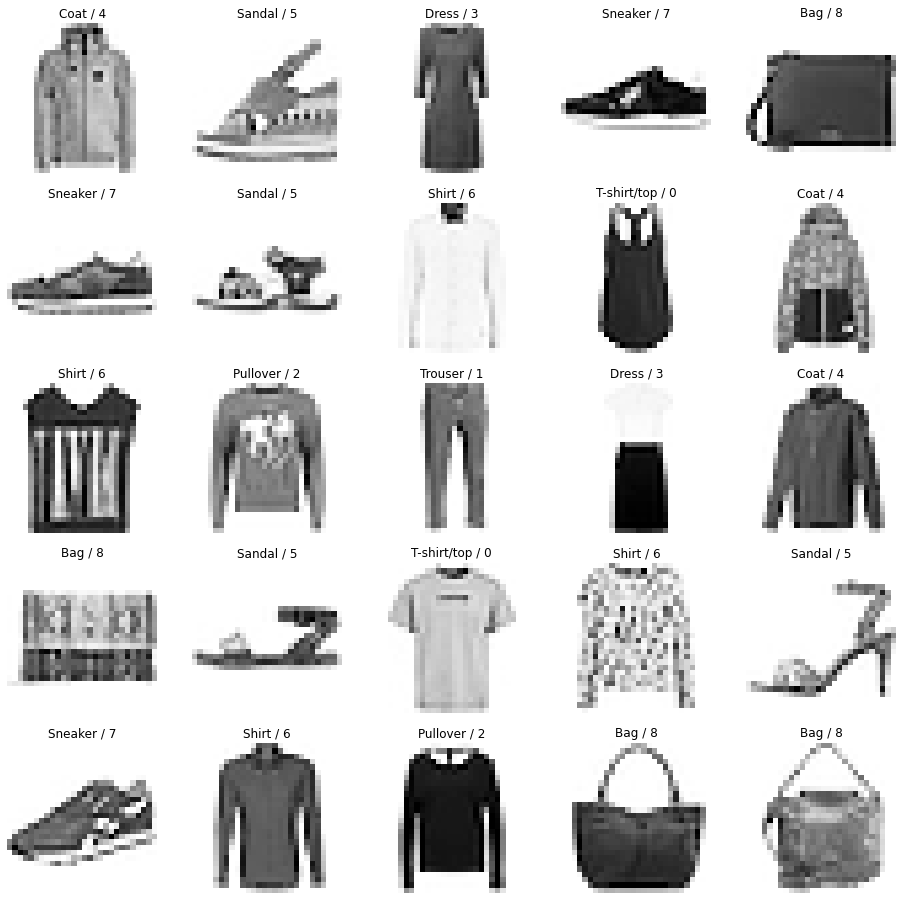

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
   plt.subplot(5,5,j);j+=1
   plt.imshow(x_train[i],cmap='Greys')
   plt.axis('off')
   plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
x_train.ndim

3

In [ ]:
x_train = np.expand_dims(x_train,-1)

In [ ]:
x_train.ndim

4

In [ ]:
x_test=np.expand_dims(x_test,-1)

In [ ]:
# feature scaling

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
# split dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

step 3) building and defining the CNN model

In [ ]:
x_train, x_test = tf.cast(x_train/255.0, tf.float32), tf.cast(x_test/255.0, tf.float32)

                      

In [ ]:
model = tf.keras.models.Sequential()


In [ ]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.build(input_shape=[None, 28, 28])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


 step 4) compile the model

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


step 5) train the model

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7100 - accuracy: 0.7662
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4838 - accuracy: 0.8326
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4396 - accuracy: 0.8457
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4132 - accuracy: 0.8550
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3919 - accuracy: 0.8625
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3780 - accuracy: 0.8666
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3648 - accuracy: 0.8711
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3532 - accuracy: 0.8751
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3433 - accuracy: 0.8780
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.333

step 6) evaluate the model

In [ ]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.3716 - accuracy: 0.8666


[0.37160587310791016, 0.866599977016449]

step 7) make predictions

In [ ]:
probability_model = tf.keras.Sequential([model,  tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


verify predictions

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_predict = class_names[np.argmax(predictions[3])]
y_predict


'Trouser'

In [ ]:
y_actual = class_names[y_test[3]]
y_actual


'Trouser'

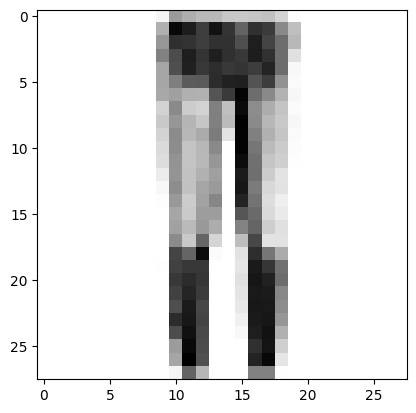

In [ ]:
img = x_test[3]
plt.imshow(img, cmap='Greys')


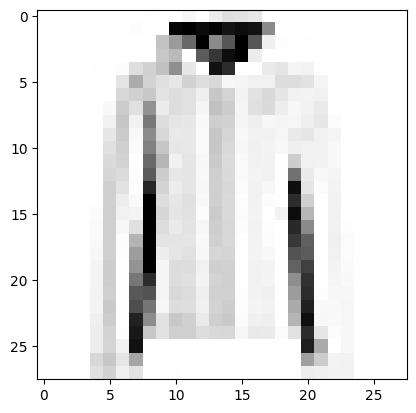

In [ ]:
img = x_test[6]
plt.imshow(img, cmap='Greys')